## Important instruction

For programming exercises only edit the code as shown in the following format.

```
##############################################

#Edit the following code

var1 = 3
var2 = 4
print(var1 + var4)

##############################################
```

You are open to experimenting with the other parts of code but you will only be awarded points if the question asked is answered which only needs finishing or making changes to the code in the above specified format.

## Question 4: Best Hypothesis

For this exercise we will be using example from the Chapter 2: Supervised Learning of **Introduction to Machine Learning, 4th Edition, The MIT Press, 2020** by Ethem Alpaydın.

The code plots Data points of family and non family cars, general hypothesis (G), specific hypothesis (S) and a hypothesis (H).

The vertices of the General Hypothesis (G) rectangle are as follows:

`(x1, y1), (x1, y2), (x2, y2), (x2, y1) = (2, 3.1), (2, 10), (9, 10), (9, 3.1)`

The vertices of the Specific Hypothesis (S) rectangle are as follows:

`(x1, y1), (x1, y2), (x2, y2), (x2, y1) = (3.9, 5), (3.9, 8.1), (7.1, 8.1), (7.1, 5)`

Your task will be to find the vertices and change the `x1, x2, y1, y2` variables to plot the best hypothesis, defined as the hypothesis with largest margin (refer Figure 2.5 from the textbook for more information).

NOTE: The points `(x1, y1), (x1, y2), (x2, y2), (x2, y1)` start from the bottom-left corner vertex of the hypothesis rectangle and follow a clock-wise order.

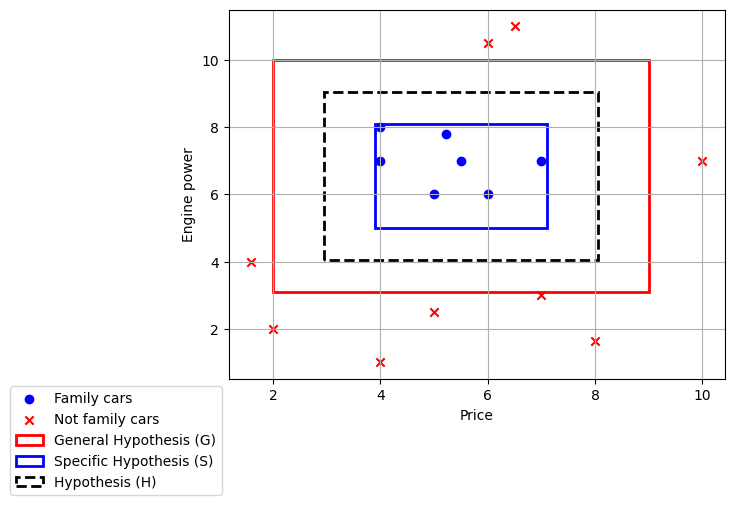

In [16]:
#Importing packages
import numpy as np
import matplotlib.pyplot as plt

# Notes for me:

#  General Hypothesis (G):
#  (x1, y1), (x1, y2), (x2, y2), (x2, y1) = (2, 3.1), (2, 10), (9, 10), (9, 3.1)

#  Specific Hypothesis (S):
#  (x1, y1), (x1, y2), (x2, y2), (x2, y1) = (3.9, 5), (3.9, 8.1), (7.1, 8.1), (7.1, 5)

#Data points
family_cars = np.array([(5, 6), (4, 7), (6, 6), (5.5, 7), (7, 7), (4, 8), (5.23, 7.8)])
not_family_cars = np.array([(1.6,4), (2, 2), (4, 1), (5, 2.5), (8, 1.63), (10, 7), (6, 10.5), (7, 3), (6.5, 11)])

#######################################################################

#Edit the following code
#Change the values of the given points to represent the best hypothesis rectangle
# Old:
# x1, x2, y1, y2 = 2.2, 8.8, 3.3, 9.8
# New:
x1, x2, y1, y2 = 2.95, 8.05, 4.05, 9.05

#######################################################################

#Vertices for best hypothesis
best_hypothesis_vertices = np.array([(x1, y1), (x1, y2), (x2, y2), (x2, y1)])

#Plot instances of cars
plt.scatter(family_cars[:, 0], family_cars[:, 1], color='blue', marker='o', label='Family cars')
plt.scatter(not_family_cars[:, 0], not_family_cars[:, 1], color='red', marker='x', label='Not family cars')

# Plot general hypothesis
general_hypothesis = plt.Polygon(np.array([(2, 3.1), (2, 10), (9, 10), (9, 3.1)]),
                          edgecolor='red', linewidth=2, fill=False, label='General Hypothesis (G)')
plt.gca().add_patch(general_hypothesis)

# Plot specific hypothesis
specific_hypothesis = plt.Polygon(np.array([(3.9, 5), (3.9, 8.1), (7.1, 8.1), (7.1, 5)]),
                          edgecolor='blue', linewidth=2, fill=False, label='Specific Hypothesis (S)')
plt.gca().add_patch(specific_hypothesis)

# Plot general hypothesis 

# Sorry I had to change the colors since they were confusing me a bit

hypothesis = plt.Polygon(best_hypothesis_vertices,
                          edgecolor='black', linewidth=2, linestyle='--',fill=False, label='Hypothesis (H)')
plt.gca().add_patch(hypothesis)

# Set plot labels and title
plt.xlabel('Price')
plt.ylabel('Engine power')
plt.legend(loc='upper right', bbox_to_anchor=(0, 0))
plt.grid(True)
plt.show()

### **Briefly explain your deduction and reasoning of the best hypothesis rectangle.**

**Answer:** 
Since we are looking for the best possible hypothesis, it would be reasonable to calculate it somewhere in between both the general and specific, since this would give us the largest margin, it would also be the balance of including positive values and excluding the negative ones. To calculate it I took the corners (x1, y2) and (x2,y1) of the general and specific hypothesis. Using the midpoint line equation we can find the x1, y1, x2, and y2 values of the rectangle for the best h. Once I had the values, I plotted them to make sure the rectangle was in the middle of the general and specific hypotheses. 


## Question 5: Best fit line

For this exercise we will be using example from the Chapter 2: Supervised Learning of **Introduction to Machine Learning, 4th Edition, The MIT Press, 2020** by Ethem Alpaydın.

It is important to understand the concepts of overfitting and underfitting. Using linear and polynomial regression we will fit the respective hypothesis lines to the [data](https://www.kaggle.com/datasets/sohier/calcofi).

Your task is to find the regression model that best fits. Although there are multiple ways to assess this, for this exercise we will only be looking at the plots from the regression lines to estimate the best fit.

NOTE: You can just compare the regression models of linear, polynomial degree 5 and polynomial degree 15 in order to write the solution. Feel free to experiment with more polynomial degrees using the edit code section.

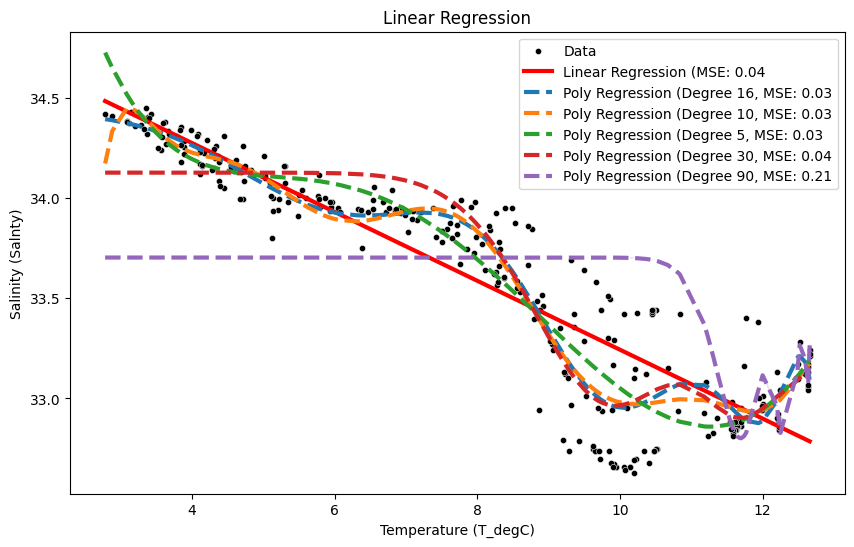

In [2]:
#Impoting packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the oceanographic dataset from the provided link
url = "https://raw.githubusercontent.com/JakeMWu/single-linear-regression-CalCOFI-oceanographic-data/main/tempsal.csv"
# Im going to use the data but import it as a csv and use it locally
# path = "url.csv"
# Use only the first 300 rows
oceanographic_data = pd.read_csv(url, nrows=300)  
# oceanographic_data = pd.read_csv(path, nrows=300)

# Remove rows with NaN values in 'T_degC' or 'Salnty'
oceanographic_data = oceanographic_data.dropna(subset=['T_degC', 'Salnty'])

# Use 'T_degC' as the feature and 'Salnty' as the target variable
X = oceanographic_data['T_degC'].values.reshape(-1, 1)
y = oceanographic_data['Salnty'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot linear regression using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.flatten(), y=y, color='black', label='Data', s = 20)
plt.title('Linear Regression')
plt.xlabel('Temperature (T_degC)')
plt.ylabel('Salinity (Salnty)')

# Fit linear regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_linear_pred = linear_model.predict(X)

# Evaluate the linear regression model
mse_linear = mean_squared_error(y_test, linear_model.predict(X_test))

# Plot the linear regression model
sns.lineplot(x=X.flatten(), y=y_linear_pred, label=f'Linear Regression (MSE: {mse_linear:.2f}', color='red', linewidth = 3)


# Fit polynomial regression using pipeline

################################################################

#Edit the following code
#You can add or delete different numbers to see how different degrees of polynomial regression fits the data
# Old:
# degrees = [5, 15] 
# New:
degrees = [16, 10, 5, 30, 90]
###############################################################

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)

    # Predict on the original data
    y_poly_pred = model.predict(X)

    # Evaluate the polynomial regression model
    mse_poly = mean_squared_error(y_test, model.predict(X_test))

    # Plot the polynomial regression model
    sns.lineplot(x=X.flatten(), y=y_poly_pred, label=f'Poly Regression (Degree {degree}, MSE: {mse_poly:.2f}', linestyle='--', linewidth = 3)

plt.legend()
plt.show()

### **Answer the following question with a brief reasoning.**
**Since there can be multiple regresion models that can be categorised as best fit, mention one regression model linear or a polynomial of Nth degree that you estimate as the best fit.**
**Briefly explain your deduction and reasoning of the best regression model**

**Answer:** 
I believe at degree 16, a polynomial graph, shows a good regression model since it's hitting most of the points, but it's a bit underfitting since anything below 33.25-33.00 salinity is not being predicted. Anything above degree 25 we see it hits some points but is putting most of them under the graphed line. It also matches a bit with the linear regression model, but it's not as accurate as the polynomial model.
